In [6]:
import pandas as pd
import json
import csv

data = []

for line in open ('labels.ndjson', 'r'):
    data.append(json.loads(line))
#print(data)

data2=[]

#df=pd.read_json('feeds.ndjson')

for line2 in open ('feeds.ndjson', 'r', encoding = 'utf-8'):
    data2.append(json.loads(line2))
    
#print(data2)

In [7]:
with open('LabelTrain.csv', 'w') as f:
    fnames = data[0].keys()
    Writer = csv.DictWriter(f, fieldnames = fnames)
    Writer.writeheader()
    for j in data:
        Writer.writerow(j)
        #print(type(j))

In [5]:
with open('FeedTrain.csv', 'w', encoding = 'utf-8') as f:
    fnames = data2[0].keys()
    Writer2 = csv.DictWriter(f, fieldnames = fnames)
    Writer2.writeheader()
    tweets = [];
    n = [];
    for j in data2:
        a=j['text']
        n.append(len(a))
        #print(len(a))
        #print(type(a))
        if len(a)<=500:
            Writer2.writerow(j)
            b = a + [0]*(500-len(a));
        else:
            b=a[0:500]
            j['text']=b
            Writer2.writerow(j)
        tweets.append(b);
    print(sum(n)/len(n))
        #print(type(j))

2188.017311538727


In [9]:
print(len(tweets))

14499


In [91]:
import csv

with open('LabelTrain.csv', newline='') as f:
    reader = csv.reader(f)
    data2 = list(reader)

Lt = data2[2:29000:2]
x = [];
xa = [];
xg = [];
xf = []
for i in range (0,14499):
    x.append(Lt[i][0:5])
    if(int(x[i][4])<1960):
        xa.append('Old');
    elif(int(x[i][4])<1975):
        xa.append('Adult');
    elif(int(x[i][4])<1985):
        xa.append('Fairly Young');
    else:
        xa.append('Young');
    if(x[i][2]=='male'):
        xg.append(0);
    else:
        xg.append(1);
    xf.append(x[i][3]);
#print(x1[0:100])

In [92]:
print(xf[0:3])

['star', 'star', 'star']


In [87]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
le = LabelEncoder()
put =  [];
for i in range (0,14499):
    y2 = le.fit_transform(tweets[i]);
    put.append(y2)
print(put[0]);

[498 333 457 172 170 484 155 183 370 495 494 436  65  51 282 476 401 206
 310 186 209 430 399  21 100 331 128 211 462   1 230  93 400 307  68 353
 150 486 460 489  63 114  71  77  69  82 328 290 414 207 205 204 364 115
  85 376  92 375 420 137 296 309 340 208 212 319 283  53 354 330 235  20
  52  19 490 191  57 189  94  54 387 496 478 446 166 323 429 389 127 352
 433 221  97 215 345 190 198 199  59  61 305 117   2 359 240 365 188 499
 138 159 145 488 112  27 348 304 381 216 418 236 192 417  28 472 427 443
 394 110  78 322 355 398 144 153 152  84  23 342  22 369 368 104 487  17
  18 105 411 362 413 142  31  44 259  99 154 491 424 360 174  45  43 151
 134 385 178 148 308 481 480 179   0 273 475 470 160 410 182 379 467 497
 288 129 444 321 176 289 173 483 187 343 327 464 177 231 301 111 473 217
 244 260 346 232 300 441 339 286 271 386 456 193 241 264 358 126  60 384
 167 293 261 265  98 434 314 315   5 252 335 334  40 169 469 109 214 233
 121 157 255 416 351 426  39 378 311 437 116 125 45

In [93]:
from sklearn import svm
inp = put;
outp = xf;
#put contains numericalized final input data
#xf contains the data about 'fame' of celebs

clf = svm.SVC()
clf.fit(inp, outp)

SVC()

In [95]:
p = put[10000:10400]
#print(p)
print(clf.predict(p));

['star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star' 'star'
 'star

In [85]:
xin = [];
yin = [];
for i in range (0,2000):
    xin.append(put[i][0])
    yin.append(put[i][1])
o = xg[0:2000];
# xg contains the data about gender
# xin and yin are 2 lists of 2 different tweet per celebrity

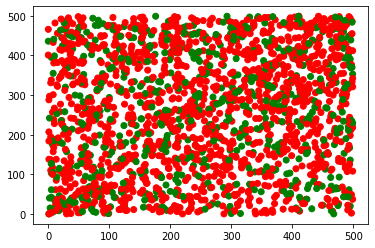

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
fig,ax = plt.subplots()
colors = {0:'red', 1:'green'}
# 0 corresponds to male, and 1 to female

op = pd.DataFrame(o);
ax.scatter(xin, yin, c=op[0].map(colors))
plt.show()
# Here we are visualizing classification of gender based on 2 dimensional input, rather than 500 dimensional.